<a href="https://colab.research.google.com/github/TranNhatHan/ExercisePythonInClass/blob/main/DoAnThongKeSuyDien.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#Tải các thư viện chưa được hỗ trợ sẵn trong Colab

In [ ]:
!pip install pingouin

     |████████████████████████████████| 183 kB 2.7 MB/s 
     |████████████████████████████████| 38.1 MB 1.2 MB/s 
     |████████████████████████████████| 9.8 MB 57.6 MB/s 
  Created wheel for pingouin: filename=pingouin-0.5.1-py3-none-any.whl size=194002 sha256=84b76f5667bb4d47791b5216a2979edcc90a72955c0587705c9900be0a72315b
  Stored in directory: /root/.cache/pip/wheels/74/a7/b6/5b5f03b0395fdada1f45d3aed76e7da48873a02805545ef652
  Created wheel for littleutils: filename=littleutils-0.2.2-py3-none-any.whl size=7048 sha256=013bcc47fc2f52807f52a2f3fda98a2cea3cb4de06abb9a71d3b7b24db765325
  Stored in directory: /root/.cache/pip/wheels/d6/64/cd/32819b511a488e4993f2fab909a95330289c3f4e0f6ef4676d
Successfully built pingouin littleutils
  Attempting uninstall: scipy
    Found existing installation: scipy 1.4.1
    Uninstalling scipy-1.4.1:
      Successfully uninstalled scipy-1.4.1
  Attempting uninstall: statsmodels
    Found existing installation: statsmodels 0.10.2
    Uninstalling statsm

In [ ]:
!pip install researchpy

# Truy cập vào các thư viện cần thiết

In [ ]:
import pandas as pd
import scipy.stats as ss
import pingouin as pg
import researchpy as rp
import statsmodels.stats.multicomp as mc
import statsmodels.api as smi
import matplotlib.pyplot as plt

# Đọc dữ liệu từ file Diet_R.csv

In [ ]:
df = pd.read_csv("/content/drive/MyDrive/Diet_R.csv")

In [ ]:
df.head()

,Person,gender,Age,Height,pre.weight,Diet,weight6weeks
0,25,NaN,41,171,60,2,60.0
1,26,NaN,32,174,103,2,103.0
2,1,0.0,22,159,58,1,54.2
3,2,0.0,46,192,60,1,54.0
4,3,0.0,55,170,64,1,63.3


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 78 entries, 0 to 77
Data columns (total 7 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Person        78 non-null     int64  
 1   gender        76 non-null     float64
 2   Age           78 non-null     int64  
 3   Height        78 non-null     int64  
 4   pre.weight    78 non-null     int64  
 5   Diet          78 non-null     int64  
 6   weight6weeks  78 non-null     float64
dtypes: float64(2), int64(5)
memory usage: 4.4 KB


# Kiểm định ANOVA One Way

## Nêu quy trình, phát biểu bài toán và xây dựng giả thuyết

QUY TRÌNH PHÂN TÍCH ANOVA MỘT CHIỀU

Kiểm tra các giả định:

- Các mẫu độc lập với nhau
- Các mẫu có cùng phương sai
- Các mẫu đều tuân theo phân phối chuẩn

Xây dựng giả thuyết

$H_{0}: \mu_{0} = \mu_{1} = ... = \mu_{n}$

$H_{a}:$ Có tối thiểu một cặp giá trị trung bình có giá trị khác nhau

Giá trị thống kê F được sử dụng trong việc ra quyết định của phân tích ANOVA một chiều. Công thức tính như sau:

$$F = \frac{MS_{B}}{MS_{W}}$$

với:

- $MS_{B} = \frac{\sum_{k}n_{k}(\overline{\rm x_{k}} - \overline{\rm x})^{2}}{k - 1}$
- $MS_{W} = \frac{\sum_{k}n_{i,k}( x_{i,k} - \overline{\rm x})^{2}}{k - 1}$

Loại bỏ giả thuyết $H_{0}$ khi chỉ số F > chỉ số F-critical hoặc giá trị $p < \alpha$.

Bài toán 1: Với thông tin về 78 người sử dụng một trong ba chế độ ăn kiêng. Kiểm tra có sự khác biệt nào về khối lượng cân nặng giảm đi của ba chế độ ăn khiêng có khác nhau hay không?

Phát biểu giả thuyết:
*   $H_0$: Không có sự khác nhau về khối lượng cân năng giảm đi trung bình của các nhóm
*   $H_a$: Có ít nhất một nhóm có khối lượng cân năng giảm đi trung bình khác biệt so với các nhóm còn lại

Tức:
$$H_{0}: \mu_{1} = \mu_{2} = \mu_{3} = \mu_{4}$$
$$H_{a}: \exists i,j |  \mu_{i} \neq \mu_{j}$$


## Tổ chức, xử lí lại dữ liệu

In [ ]:
df = df.dropna()
df["WeightLost"] = df["pre.weight"] - df["weight6weeks"]

In [ ]:
df['Diet'].replace({1: 'One', 2: 'Two', 3: 'Three'}, inplace= True)

In [ ]:
rp.summary_cont(df['WeightLost'])

,Variable,N,Mean,SD,SE,95% Conf.,Interval
0,WeightLost,76.0,3.9461,2.5058,0.2874,3.3735,4.5187


In [ ]:
rp.summary_cont(df['WeightLost'].groupby(df['Diet']))

,N,Mean,SD,SE,95% Conf.,Interval
Diet,,,,,,
One,24,3.3000,2.2401,0.4573,2.3541,4.2459
Three,27,5.1481,2.3956,0.4610,4.2005,6.0958
Two,25,3.2680,2.4645,0.4929,2.2507,4.2853


/usr/local/lib/python3.7/dist-packages/matplotlib/cbook/__init__.py:1376: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  X = np.atleast_1d(X.T if isinstance(X, np.ndarray) else np.asarray(X))


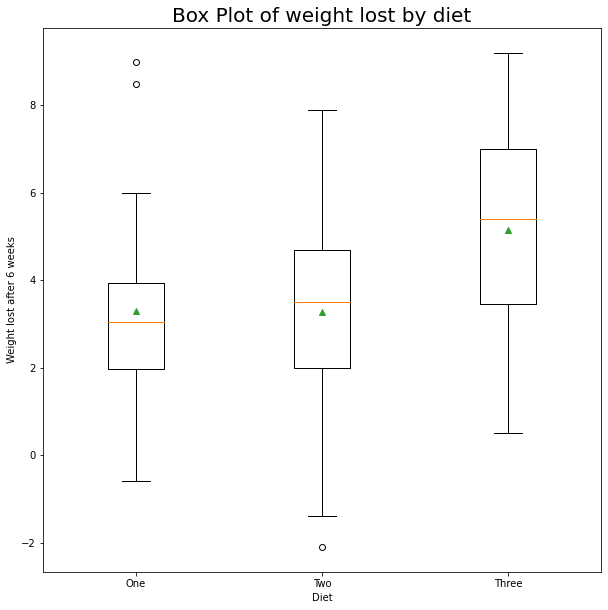

In [ ]:
fig = plt.figure(figsize= (10, 10))
ax = fig.add_subplot()
ax.set_title("Box Plot of weight lost by diet", fontsize= 20)
data = [df['WeightLost'][df['Diet'] == 'One'],
        df['WeightLost'][df['Diet'] == 'Two'],
        df['WeightLost'][df['Diet'] == 'Three']]
ax.boxplot(data, labels= ['One', 'Two', 'Three'], showmeans= True)
plt.xlabel("Diet")
plt.ylabel("Weight lost after 6 weeks")
plt.show()

Tách dữ liệu theo ba chế độ ăn khiêng

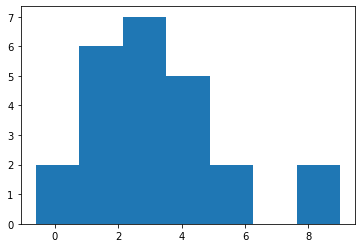

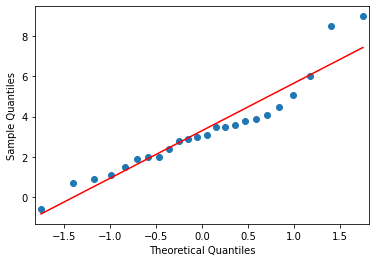

In [ ]:
one = list(df['WeightLost'][df['Diet'] == 'One'])
plt.hist(one, 7)
_ = smi.qqplot(pd.Series(one), line = "r")

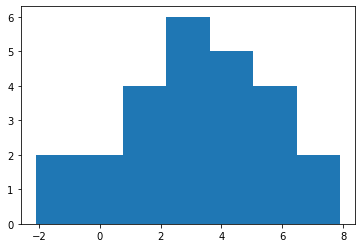

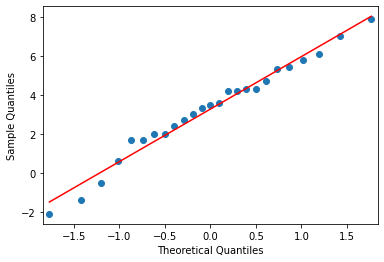

In [ ]:
two = list(df['WeightLost'][df['Diet'] == 'Two'])
plt.hist(two, 7)
_ = smi.qqplot(pd.Series(two), line = "r")

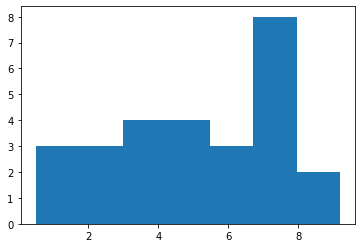

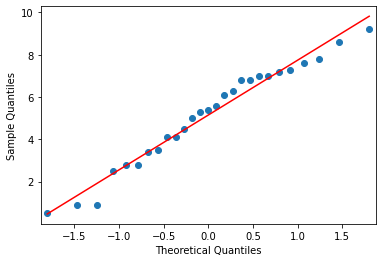

In [ ]:
three = list(df['WeightLost'][df['Diet'] == 'Three'])
plt.hist(three , 7)
_ = smi.qqplot(pd.Series(three ), line = "r")

In [ ]:
alpha = 0.05

## Kiểm tra các giả định

* Kiểm tra mẫu dữ liệu có được lấy từ quần thể có phân phối chuẩn hoặc xấp xỉ phân phối chuẩn hay không?

In [ ]:
for i in [one, two, three]:
  statistic, p_value = ss.shapiro(i)
  print("P value:", p_value)
  if p_value < alpha:
    print("Có bằng chứng bác bỏ giả thuyết mẫu được lấy từ quần thể có phân phối chuẩn")
    break
  else:
    print("Không có bằng chứng bác bỏ giả thuyết mẫu được lấy từ quần thể phân phối chuẩn")

P value: 0.07748671621084213
Không có bằng chứng bác bỏ giả thuyết mẫu được lấy từ quần thể phân phối chuẩn
P value: 0.8721737861633301
Không có bằng chứng bác bỏ giả thuyết mẫu được lấy từ quần thể phân phối chuẩn
P value: 0.37203603982925415
Không có bằng chứng bác bỏ giả thuyết mẫu được lấy từ quần thể phân phối chuẩn


**Không có bằng chứng bác bỏ giả thuyết mẫu được lấy từ quần thể phân phối chuẩn, tức là ta vẫn có thể chấp nhận mẫu được lấy từ quần thể có phân phối chuẩn**

* Kiểm tra phương sai của mẫu có sự khác biệt nào không?

In [ ]:
statistic, p_value = ss.bartlett(one, two, three)
print(p_value)
if p_value < alpha:
  print("Có bằng chứng bác bỏ giả thuyết khối lượng giảm đi của các chế độ ăn có phương sai bằng nhau")
else:
  print("Không có bằng chứng bác bỏ giả thuyết khối lượng giảm đi của các chế độ ăn có phương sai bằng nhau")

0.8966804982694925
Không có bằng chứng bác bỏ giả thuyết khối lượng giảm đi của các chế độ ăn có phương sai bằng nhau


**Không có bằng chứng bác bỏ giả thuyết khối lượng giảm đi của các chế độ ăn có phương sai bằng nhau, tức là ta vẫn có thể chấp nhận phương sai về khối lượng giảm đi của các chế độ ăn là bằng nhau**

> Từ các kiểm định trên ta giả định rằng các mẫu dữ liệu được lấy từ phân phối chuẩn và không có sự khác biệt về phương sai về độ sâu trung bình giữa các địa điểm. Và tất cả các nhóm đều độc lập với nhau.

## Tiến hành kiểm định, đưa ra kết quả

In [ ]:
statistic, p_value = ss.f_oneway(one, two, three)
print(p_value)
if p_value < alpha:
  print("Có bằng chứng bác bỏ giả thuyết H0")
else:
  print("Không có bằng chứng bác bỏ giả thuyết H0")

0.006595853108669741
Có bằng chứng bác bỏ giả thuyết H0


**VỚI 95% ĐỘ TIN CẬY TA CÓ BẰNG CHỨNG ĐỂ BÁC BỎ GIẢ THUYẾT KHỐI LƯỢNG CÂN NẶNG GIẢM ĐI TRUNG BÌNH CỦA CÁC CHẾ ĐỘ ĂN LÀ BẰNG NHAU. TỨC CÓ ÍT NHẤT MỘT CHẾ ĐỘ ĂN CÓ HIỆU QUẢ GIẢM KHÁC BIỆT SO VỚI CÁC CHẾ ĐỘ CÒN LẠI**

Bảng chi tiết về phân tích ANOVA

In [ ]:
pg.anova(dv="WeightLost", between='Diet', data = df ,detailed=True)

,Source,SS,DF,MS,F,p-unc,np2
0,Diet,60.527008,2,30.263504,5.383104,0.006596,0.128527
1,Within,410.401807,73,5.621943,NaN,NaN,NaN


So sánh giữa các nhóm

In [ ]:
comp = mc.MultiComparison(df['WeightLost'], df['Diet'])
post_hoc_res = comp.tukeyhsd()
pd.DataFrame(post_hoc_res.summary(), columns = ["Group 1",	"Group 2",	"Mean_diff",	"P-adj",	"Lower",	"Upper",	"Reject"]).iloc[1:]

,Group 1,Group 2,Mean_diff,P-adj,Lower,Upper,Reject
1,One,Three,1.8481,0.0188,0.2567,3.4396,True
2,One,Two,-0.032,0.9988,-1.6531,1.5891,False
3,Three,Two,-1.8801,0.0152,-3.4546,-0.3057,True


Từ bảng trên ta có thể thấy được chế độ ăn khiêng thứ ba là chế độ có sự khác biệt so với các nhóm còn lại

Hình vẽ minh họa

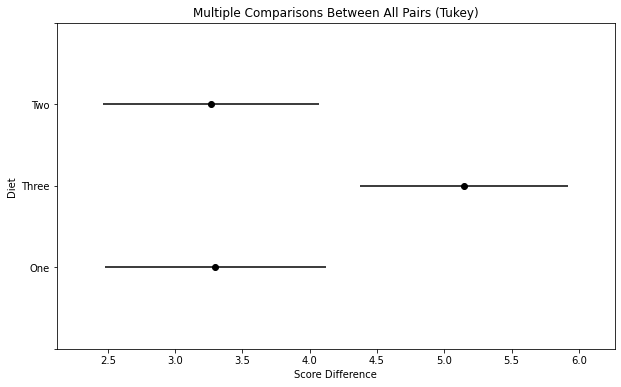

In [ ]:
sd = post_hoc_res.plot_simultaneous(ylabel= "Diet", xlabel= "Score Difference")

Dễ dàng nhận thấy rằng chế độ ăn khiêng thứ ba cho hiệu quả giảm cân cao hơn so với hai chế độ còn lại.

# Kiểm định ANOVA Two Way

Bài toán 2: Với thông tin về 78 người sử dụng một trong ba chế độ ăn kiêng. Kiểm tra có sự khác biệt nào về khối lượng cân nặng giảm đi của ba chế độ ăn khiêng và giới tính có khác nhau hay không?

Phát biểu giả thuyết:

$H_0$:
* Không có sự khác biệt về khối lượng giảm đi theo các chế độ ăn khiêng
* Không có sự khác biệt về khối lượng giảm đi theo giới tính
* Ảnh hưởng của chế độ ăn không phụ thuộc vào ảnh hưởng của giới tính

$H_a$:
* Có sự ít nhất một nhóm khác biệt về khối lượng giảm đi theo các chế độ ăn khiêng
* Có sự ít nhất một nhóm khác biệt về khối lượng giảm đi theo giới tính
* Có ảnh hưởng tương tác chế độ ăn và giới tính đến hiệu quả giảm cân


In [ ]:
df['gender'].replace({0: 'Female', 1: 'Male'}, inplace= True)

In [ ]:
rp.summary_cont(df['WeightLost'])

,Variable,N,Mean,SD,SE,95% Conf.,Interval
0,WeightLost,76.0,3.9461,2.5058,0.2874,3.3735,4.5187


In [ ]:
alpha = 0.05

In [ ]:
pg.anova(dv="WeightLost", between=['Diet', 'gender'], data = df ,detailed=True)

,Source,SS,DF,MS,F,p-unc,np2
0,Diet,60.417220,2.0,30.208610,5.619026,0.005456,0.138335
1,gender,0.168696,1.0,0.168696,0.031379,0.859910,0.000448
2,Diet * gender,33.904068,2.0,16.952034,3.153204,0.048842,0.082646
3,Residual,376.329043,70.0,5.376129,NaN,NaN,NaN


So sánh giữa các nhóm

In [ ]:
pg.pairwise_ttests(dv = 'WeightLost', between = ['Diet', 'gender'], data = df)

,Contrast,Diet,A,B,Paired,Parametric,T,dof,alternative,p-unc,BF10,hedges
0,Diet,-,One,Three,False,True,-2.846202,48.862035,two-sided,0.006450,6.822,-0.783040
1,Diet,-,One,Two,False,True,0.047594,46.865130,two-sided,0.962242,0.285,0.013357
2,Diet,-,Three,Two,False,True,2.785776,49.435604,two-sided,0.007552,6.019,0.762399
3,gender,-,Female,Male,False,True,-0.209097,68.809119,two-sided,0.834991,0.244,-0.047934
4,Diet * gender,One,Female,Male,False,True,-0.616316,16.916289,two-sided,0.545891,0.433,-0.255252
5,Diet * gender,Three,Female,Male,False,True,1.783161,18.936543,two-sided,0.090598,1.129,0.697204
6,Diet * gender,Two,Female,Male,False,True,-1.537776,20.504943,two-sided,0.139393,0.861,-0.606559
